## Introduction

In the following notebook, I will be preparing Listings data pertaining to San Francisco Airbnb's. Raw data can be found [here](http://insideairbnb.com/get-the-data.html).


**Read in libraries**

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

**Set notebook preferences**

In [175]:
#Set options for pandas
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth', 100)

#Set style for plot
plt.style.use('ggplot')

#Set path to visuals from EDA
visualizations = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\Visualizations\Listings EDA/'

**Read in data**

In [176]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\Data\02_Cleaned'

#Read in data
df = pd.read_csv(path + '/2020_0520_Listings_Cleaned.csv', index_col=0, parse_dates=['host_since','first_review','last_review'],
                 dtype = {'review_scores_accuracy':'category','review_scores_checkin':'category',	
                          'review_scores_cleanliness':'category','review_scores_communication':'category',
                          'review_scores_rating':'category','review_scores_location':'category', 'review_scores_value':'category',
                         'zipcode':'object'}
                )

### Data Overview

In [177]:
#Preview data
print('Data shape:',df.shape)
display(df.head(3))

Data shape: (113994, 72)


,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,interaction,is_location_exact,last_review,latitude,license,longitude,maximum_nights,minimum_nights,monthly_price,name,neighborhood_overview,neighbourhood_cleansed,notes,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,space,summary,transit,weekly_price,zipcode
0,*Full access to patio and backyard (shared with us and our dog who live upstairs) *Beautiful gar...,3,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets live on this property ,Dog(s), Free street parking ,H...",25,106,43,58,1.0,Real Bed,1.0,2.0,1,0,0,3 weeks ago,moderate,San Francisco,100.0,New update: the house next door is under construction and there is the possibility of noise from...,25.0,2009-07-23,2,We are a family with 2 boys born in 2009 and 2011. We have a new puppy (Feb 2017) named Tucker ...,1.0,1169,1.0,1.0,1.0,"San Francisco, California, United States",Holly,90.0,within an hour,2008-07-31,"email , phone , facebook , reviews , kba",* No Pets - even visiting guests for a short time period. * No Smokers allowed - even if smoking...,958,1,"A family of 4 lives upstairs with their dog. Normally we are able to meet guests, but we like to...",1,2020-03-13,37.76931,STR-0001256,-122.43386,1125,1,4200.0,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *Steps away from grassy park with 2 playgrounds and R...,Western Addition,"Due to the fact that we have children and a dog, we are up early 7-8am and their footsteps or pa...",240,56,170.0,Apartment,0,0,1,10.0,10.0,10.0,10.0,10.0,97.0,9.0,1.84,Entire home/apt,100.0,"Newly remodeled, modern, and bright garden unit in historic Victorian home. *New fixtures and f...",New update: the house next door is under construction and there is the possibility of noise from...,*Public Transportation is 1/2 block away. *Centrally located with easy access to major lines of...,1120.0,94117
1,"Our deck, garden, gourmet kitchen and extensive art, design and literature library.",5,"Internet,Wifi,Kitchen,Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , First aid ki...",0,0,0,0,1.0,Real Bed,2.0,3.0,1,0,0,2 weeks ago,strict 14 with grace period,San Francisco,100.0,"We live in a large Victorian house on a quiet street, nestled between the Mission district and N...",0.0,2009-05-03,2,Philip: English transplant to the Bay Area and half Spanish adoptive son of hardworking Yorkshir...,1.0,8904,1.0,0.0,2.0,"San Francisco, California, United States",Philip And Tania,100.0,within a day,2009-03-02,"email , phone , reviews , kba , work email","Please respect the house, the art work, the furniture and have fun!",5858,0,NaN,1,2017-08-06,37.74511,STR-0001256,-122.42102,60,30,5500.0,Creative Sanctuary,I love how our neighborhood feels quiet but is so close to lots of hustle and bustle. There is t...,Bernal Heights,All the furniture in the house was handmade so there is a very special feeling there. We love li...,111,0,235.0,Apartment,0,0,1,10.0,10.0,10.0,10.0,10.0,98.0,9.0,0.83,Entire home/apt,2.0,"We live in a large Victorian house on a quiet street, nestled between the Mission district and N...",NaN,The train is two blocks away and you can stop and get a 

### Quick EDA

**Price Distribution**

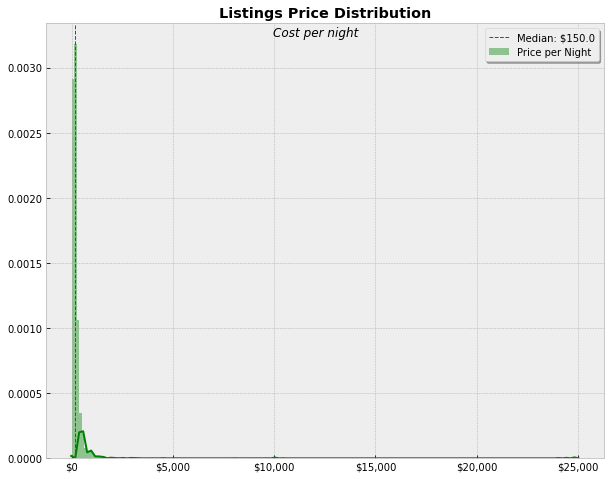

In [178]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(filename= visualizations +  'price_hist.png', width=700, height=400)

**Price by Neighborhood**

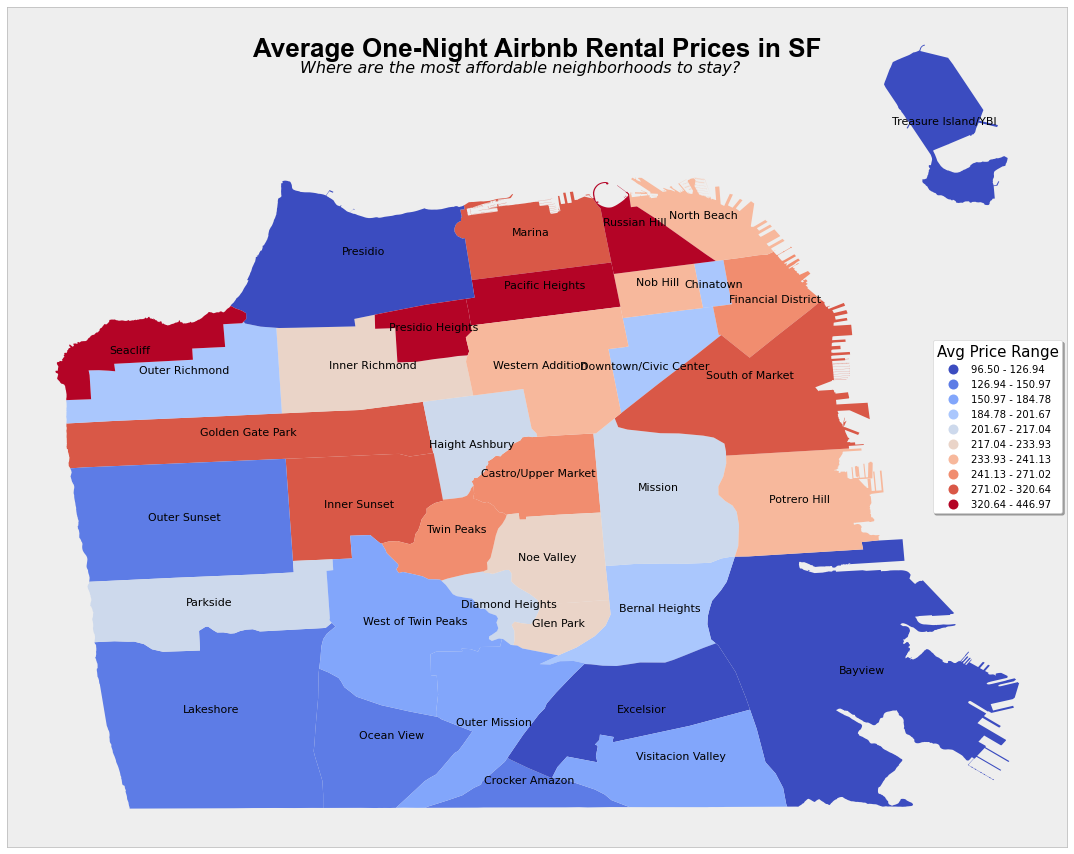

In [179]:
Image(filename= visualizations +  'geopandas_rent.png', width=900, height=900)

**Price by Month**

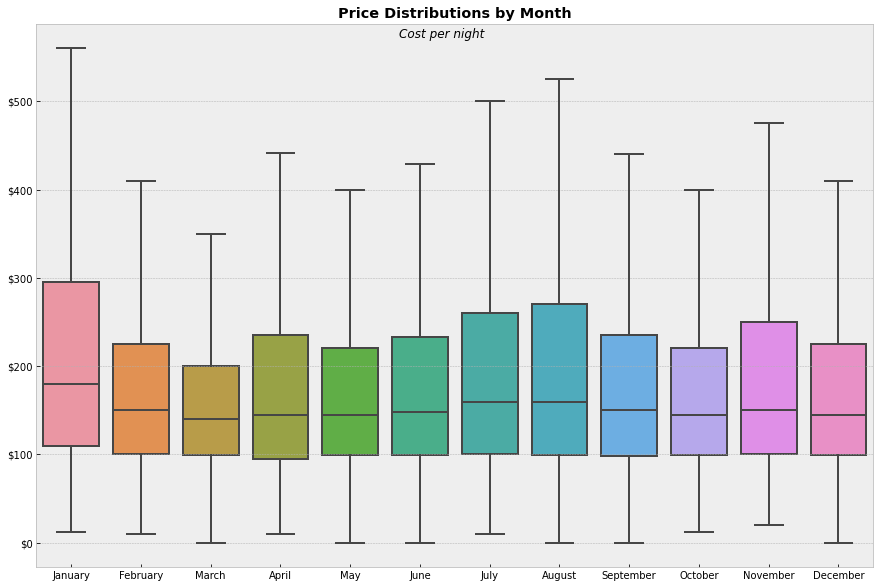

In [180]:
Image(filename= visualizations +  'month_price_box.png', width=700, height=400)

**Price by Day**

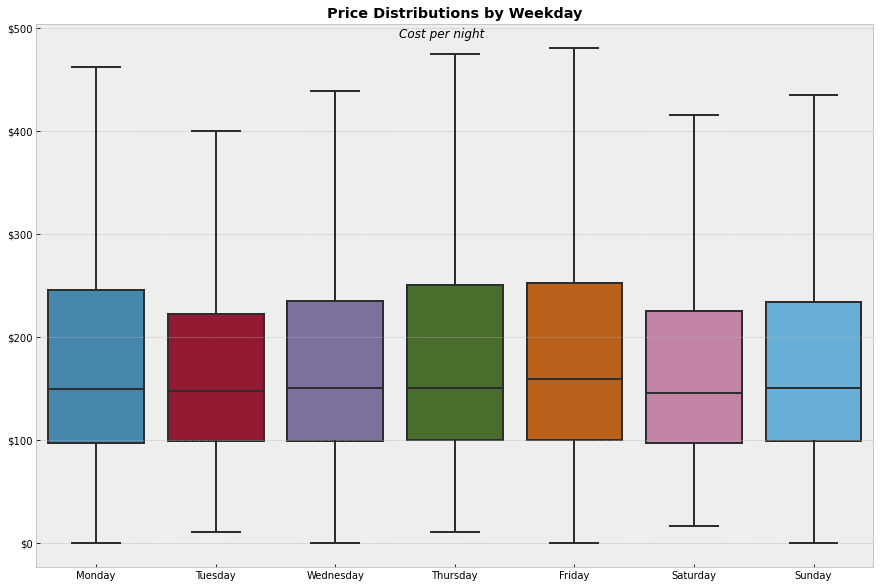

In [181]:
Image(filename= visualizations +  'weekday_price_box.png', width=700, height=400)

### Preprocessing

#### Drop Unnecessary columns

In [182]:
#Cols containing text data not needed for machine learning
cols =['notes','access', 'interaction', 'transit', 'house_rules', 'neighborhood_overview', 
       'description','host_id','id','name','summary','host_about', 
       'space', 'host_location', 'host_name']

#Drop cols
df.drop(cols, axis = 1, inplace = True)

### Feature Engineering

**Extract date information**

In [183]:
#Extract time data from first_review
df['first_review_year'] = df['first_review'].dt.year
df['first_review_month'] = df['first_review'].dt.month_name()
df['first_review_weekday'] = df['first_review'].dt.day_name()

#Extract time data from last_review
df['last_review_year'] = df['last_review'].dt.year
df['last_review_month'] = df['last_review'].dt.month_name()
df['last_review_weekday'] = df['last_review'].dt.day_name()

#Drop original date columns
df.drop(['first_review','last_review'],axis = 1,inplace = True)

#Check
display(df.iloc[:,-6:].head(3))

,first_review_year,first_review_month,first_review_weekday,last_review_year,last_review_month,last_review_weekday
0,2009.0,7.0,Thursday,2020.0,3.0,Friday
1,2009.0,5.0,Sunday,2017.0,8.0,Sunday
2,2009.0,8.0,Monday,2020.0,3.0,Friday


**Add amenities_count**

In [184]:
#Get a count of in lower_case amenities
df['amenities'] = df['amenities'].str.lower()
df['amenities_count'] = df['amenities'].str.count(',') + 1 #count commas and add 1 for last word

#### Dummy Variables

In [188]:
df.select_dtypes('object').head(3)

,amenities,bed_type,calendar_updated,cancellation_policy,city,host_response_time,host_verifications,license,neighbourhood_cleansed,property_type,room_type,first_review_weekday,last_review_weekday
0,"tv, cable tv ,internet,wifi,kitchen, pets live on this property ,dog(s), free street parking ,h...",Real Bed,3 weeks ago,moderate,San Francisco,within an hour,"email , phone , facebook , reviews , kba",STR-0001256,Western Addition,Apartment,Entire home/apt,Thursday,Friday
1,"internet,wifi,kitchen,heating, family/kid friendly ,washer,dryer, smoke detector , first aid ki...",Real Bed,2 weeks ago,strict 14 with grace period,San Francisco,within a day,"email , phone , reviews , kba , work email",STR-0001256,Bernal Heights,Apartment,Entire home/apt,Sunday,Sunday
2,"tv,internet,wifi,kitchen, free street parking ,heating,washer,dryer, smoke detector , carbon mo...",Real Bed,5 months ago,strict 14 with grace period,San Francisco,within an hour,"email , phone , reviews , jumio , government id",STR-0001256,Haight Ashbury,Apartment,Private room,Monday,Friday


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113994 entries, 0 to 7932
Data columns (total 62 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   accommodates                                  113994 non-null  int64         
 1   amenities                                     113994 non-null  object        
 2   availability_30                               113994 non-null  int64         
 3   availability_365                              113994 non-null  int64         
 4   availability_60                               113994 non-null  int64         
 5   availability_90                               113994 non-null  int64         
 6   bathrooms                                     113994 non-null  float64       
 7   bed_type                                      113994 non-null  object        
 8   bedrooms                                      113994 non

**Get dummies for amenities and host_verifications**

In [167]:
#Get dummies from amenities and host_verifications and store in sep df's
amenities_dummies = df['amenities'].str.get_dummies(sep = ',')
host_verifications_dummies = df['host_verifications'].str.get_dummies(sep=',')

#Concatenate dummies
dummies= pd.concat([amenities_dummies, host_verifications_dummies], axis=1)

In [168]:
#Clean-up dummiies
dummies.columns = dummies.columns.str.strip() #strip white space from header edges
dummies.columns = dummies.columns.str.replace(' ', '_') #Replace white space withing header name
dummies = dummies.loc[:,~dummies.columns.duplicated()] #Drop duplicate columns

#Remove column headers shorter than 3 characters in length
for col in dummies.columns: 
    if len(col) < 3:
        dummies.drop(columns= col, inplace=True)

#Combine dummies and df
df = pd.concat([df, dummies], axis=1)

#Drop amenities column and host_verifications. Sort cols alphabetically
df.drop(columns = ['amenities','host_verifications'], inplace = True)
df = df.reindex(sorted(df.columns), axis = 1)

#Check
print('Shape of data: ', df.shape)
display(df.head())

Shape of data:  (113994, 313)


,24-hour_check-in,None,accessible-height_bed,accessible-height_toilet,accommodates,air_conditioning,air_purifier,alarm_system,amazon_echo,amenities_count,apple_tv,availability_30,availability_365,availability_60,availability_90,baby_bath,baby_monitor,babysitter_recommendations,baking_sheet,balcony,barbecue_utensils,bath_towel,bathroom_essentials,bathrooms,bathtub,bathtub_with_bath_chair,bbq_grill,beach_essentials,beach_view,beachfront,bed_linens,bed_type,bedroom_comforts,bedrooms,beds,bidet,body_soap,bread_maker,breakfast,breakfast_bar,breakfast_table,building_staff,buzzer/wireless_intercom,cable_tv,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_updated,cancellation_policy,carbon_monoxide_detector,cat(s),ceiling_fan,central_air_conditioning,changing_table,chef_s_kitchen,children’s_books_and_toys,children’s_dinnerware,city,cleaning_before_checkout,cleaning_fee,coffee_maker,convection_oven,cooking_basics,courtyard,crib,day_bed,desk,dining_area,disabled_parking_spot,dishes_and_silverware,dishwasher,dog(s),doorman,double_oven,driveway_parking,dryer,dual_vanity,dvd_player,electric_profiling_bed,elevator,email,en_suite_bathroom,espresso_machine,essentials,ethernet_connection,ev_charger,exercise_equipment,extra_people,extra_pillows_and_blankets,extra_space_around_bed,extra_space_around_shower_and_toilet,facebook,family/kid_friendly,fax_machine,fire_extinguisher,fire_pit,fireplace_guards,firm_mattress,first_aid_kit,first_review_month,first_review_weekday,first_review_year,fixed_grab_bars_for_shower,fixed_grab_bars_for_toilet,flat_path_to_front_door,flat_path_to_guest_entrance,formal_dining_area,free_parking_on_premises,free_street_parking,full_kitchen,game_console,garage_parking,garden_or_backyard,gas_fireplace,gas_oven,google,government_id,ground_floor_access,guests_included,gym,hair_dryer,hammock,handheld_shower_head,hangers,hbo_go,heat_lamps,heated_floors,heated_towel_rack,heating,high-resolution_computer_monitor,high_chair,home_theater,host_greets_you,host_has_profile_pic,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,host_response_time,host_since,hot_tub,hot_water,hot_water_kettle,ice_machine,identity_manual,indoor_fireplace,instant_bookable,internet,iron,ironing_board,is_location_exact,jetted_tub,jumio,kba,keypad,kitchen,kitchenette,lake_access,laptop_friendly_workspace,last_review_month,last_review_weekday,last_review_year,latitude,license,lock_on_bedroom_door,lockbox,long_term_stays_allowed,longitude,lounge_area,luggage_dropoff_allowed,manual_offline,manual_online,massage_table,maximum_nights,media_room,memory_foam_mattress,microwave,mini_fridge,minimum_nights,mobile_hoist,monthly_price,mountain_view,mudroom,murphy_bed,natural_gas_barbeque,neighbourhood_cleansed,nest_thermometer,netflix,no_stairs_or_steps_to_enter,number_of_reviews,number_of_reviews_ltm,office,offline_government_id,other,other_pet(s),outdoor_kitchen,outdoor_parking,outdoor_seating,outlet_covers,oven,pack_’n_play/travel_crib,paid_parking_off_premises,paid_parking_on_premises,patio_or_balcony,pets_allowed,pets_live_on_this_property,phone,piano,pillow-top_mattress,pocket_wifi,pool,portable_air_conditioning,price,printer,private_bathroom,private_entrance,private_hot_tub,private_living_room,projector_and_screen,property_type,rain_shower,refrigerator,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews,reviews_per_month,roll-in_shower,rooftop,room-darkening_shades,room_type,safety_card,security_cameras,security_deposit,self_check-in,selfie,sent_id,shampoo,shared_gym,shared_hot_tub,shared_pool,shower_bathtub_combo,shower_chair,shower_gel,single_level_home,ski-in/ski-out,smart_home_technology,smart_lock,smart_tv,smoke_detector,smoking_allowed,soaking_tub,sonos_

**Split Data**

**Write Training and Test Data to CSV**